In [61]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.datasets import cifar10

In [24]:
import numpy as np

In [76]:
import keras.backend
keras.backend.image_data_format()

'channels_last'

In [6]:
import matplotlib.pyplot as plt

### Load the CIFAR10 dataset

In [3]:
(X_train, y_train), (X_test, y_test)  = cifar10.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

                                 Show some of the images with labels

In [29]:
def get_label(label_as_np_array, label_dict):

    return labels[int(label_as_np_array)]

In [56]:
def plot_images(count, label_dict):
    list_of_labels = np.random.randint(y_train.shape[0], size=count)
    plt.figure(figsize=(int(1.5)* count, 2 * count))
    plt.tight_layout()

    for i in np.arange(0,count):
        # Subplot
        plt.subplot(count - 3, 3, i + 1, ymargin=1)
        # Label of the image
        label_as_np_array = y_train[list_of_labels[i]]
        plt.title(get_label(label_as_np_array, label_dict)+ '  ' + str(list_of_labels[i]))
        # Show the image
        image_to_show = X_train[list_of_labels[i]]
        plt.imshow(image_to_show)
        
    return plt.show()

                                              CIFAR10 labels

In [40]:
cifar10_labels = {
        0:"airplane",
        1:"automobile",
        2:"bird",
        3:"cat",
        4:"deer",
        5:"dog",
        6:"frog",
        7:"horse",
        8:"ship",
        9:"truck"
        }

                                           Normalize image input
                                           [0..255] ====> [0..1] 

In [60]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [64]:
X_train.shape

(50000, 32, 32, 3)

                                    Convert labels to one-hot encoding

In [59]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

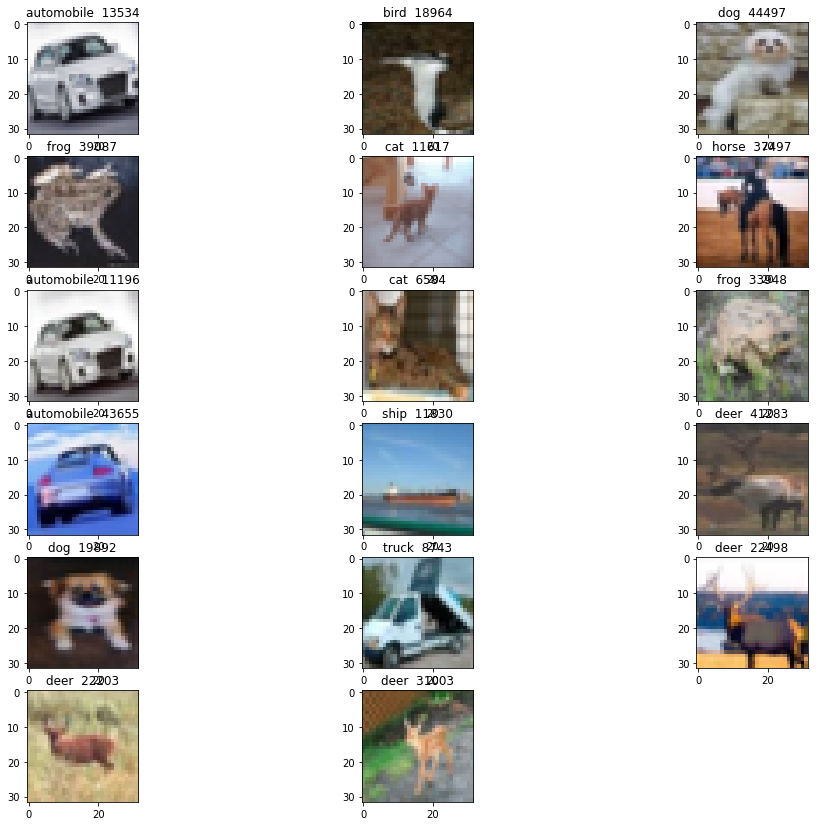

In [57]:
plot_images(count=17, label_dict=cifar10_labels)

### AlexNet

INPUT => [CONV => RELU => POOL] * 2 => [CONV => RELU] * 3 => POOL => [FC => RELU => DO] * 2 => SOFTMAX

In [77]:
def alex_net(batch_size, learning_rate, num_epochs, num_classes, dataset=(X_train, y_train, X_test, y_test)):
    X_train, y_train, X_test, y_test = dataset
    model = Sequential()
    
    # Input => [CONV => RELU => POOL] * 2 => ...
    # First
    model.add(Conv2D(32,(3,3),input_shape = X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Second
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # ... => [CONV => RELU] * 3
    # First
    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))
    # Second
    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))

    
    # ... => POOL => ...
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ... => [FC => RELU => DO] * 2 => ...
    model.add(Flatten())
    # First
    model.add(Dense(2048))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    # Second
    model.add(Dense(2048))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    
    # ... => Softmax => Output
    model.add(Dense(num_classes))
    model.add(Activation("softmax"))
    
    # Compile and train the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate),
                  metrics = ["accuracy"])
    
    return model.fit(X_train, y_train, 
              batch_size=batch_size, 
              epochs=num_epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
        
    

In [89]:
def plot_results(model):
    plt.figure(figsize=(20,15))
    
    plt.subplot(211)
    plt.title("Losses")
    plt.grid()
    plt.legend(("Training losses", "Test losses"))
    plt.plot(np.arange(0,len(model.history["loss"])), model.history["loss"])
    plt.plot(np.arange(0,len(model.history["val_loss"])), model.history["val_loss"])
    
    plt.subplot(212)
    plt.title("Accuracy")
    plt.grid()
    plt.legend(("Training Accuracy", "Test Accuracy"))
    plt.plot(np.arange(0,len(model.history["acc"])), model.history["acc"])
    plt.plot(np.arange(0,len(model.history["val_acc"])), model.history["val_acc"])
    return plt.show()

In [ ]:
t = alex_net(batch_size=32, learning_rate=0.01, num_epochs=100, num_classes=10, dataset=(X_train, y_train, X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 194us/step - loss: 2.2559 - acc: 0.1461 - val_loss: 2.0664 - val_acc: 0.2006
Epoch 2/100
50000/50000 [==============================] - 10s 192us/step - loss: 2.0434 - acc: 0.2196 - val_loss: 2.1814 - val_acc: 0.2224
Epoch 3/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.8315 - acc: 0.3094 - val_loss: 1.6708 - val_acc: 0.3736
Epoch 4/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.6205 - acc: 0.4025 - val_loss: 1.5655 - val_acc: 0.4259
Epoch 5/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.4930 - acc: 0.4535 - val_loss: 1.5923 - val_acc: 0.4232
Epoch 6/100
50000/50000 [==============================] - 10s 193us/step - loss: 1.3919 - acc: 0.4926 - val_loss: 1.3568 - val_acc: 0.5120
Epoch 7/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.3128 - acc: 0.5259 - val_loss

In [ ]:
plot_results(t)

### Another model similar to AlexNet, but without dense layers (Fully Convolutional)

INPUT => [CONV => RELU => POOL] * 2 => [CONV => RELU] * 3 => POOL => DO => SOFTMAX

In [ ]:
def second_net(batch_size, learning_rate, num_epochs, num_classes, dataset=(X_train, y_train, X_test, y_test)):
    X_train, y_train, X_test, y_test = dataset
    model = Sequential()
    
    # Input => [CONV => RELU => POOL] * 2 => ...
    # First
    model.add(Conv2D(32,(3,3),input_shape = X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Second
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # ... => [CONV => RELU] * 3
    # First
    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))
    # Second
    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))

    
    # ... => POOL => ...
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ... => DO => ...
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    # ... => Softmax => Output
    model.add(Dense(num_classes))
    model.add(Activation("softmax"))
    
    # Compile and train the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate),
                  metrics = ["accuracy"])
    
    return model.fit(X_train, y_train, 
              batch_size=batch_size, 
              epochs=num_epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

In [ ]:
t2 = second_net(batch_size=32, learning_rate=0.01, num_epochs=100, num_classes=10, dataset=(X_train, y_train, X_test, y_test))

In [ ]:
plot_results(t2)